In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import seaborn as sns
import numpy as np
sns.set_style('ticks') # setting style
sns.set_context('talk') # setting context
sns.set_palette('colorblind') # setting palette
reg = pd.read_csv('data/simple_metric/bs/reg_metrics_cifar10_ResNet18_bs128_bsval64_buf500_ff0.5_epochs200_lr0.1_optSGD_split0.8_augFalse.csv')

In [12]:
noreg80=pd.read_csv('data/simple_metric/bs/baseline_metrics_cifar10_ResNet18_bs128_bsval100_buf2000_ff1.0_epochs200_lr0.1_optSGD_split0.8_augFalse.csv')
noreg100=pd.read_csv('data/simple_metric/bs/baseline_metrics_cifar10_ResNet18_bs128_bsval100_buf2000_ff1.0_epochs200_lr0.1_optSGD_split0.9999_augFalse.csv')

/tmp/ipykernel_2829576/2724963355.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


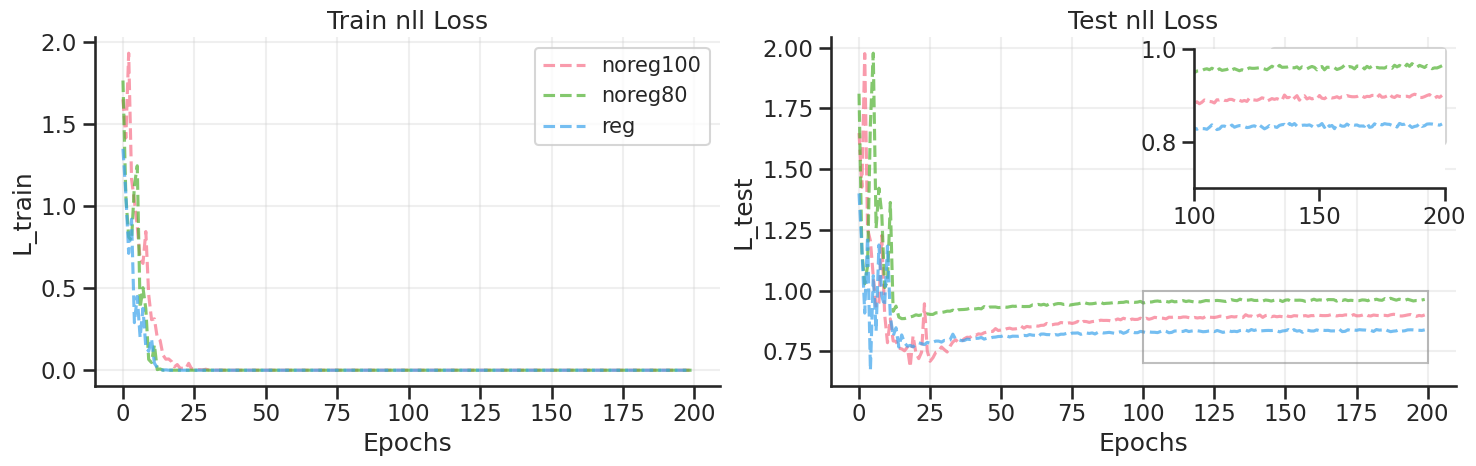

0.2

In [19]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
colors = sns.color_palette("husl", 3)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(reg['it'], reg['Loss_train'], 
        label='noreg100', color=colors[0], alpha=0.7,
        linestyle='--')
axes[0].plot(noreg80['it'], noreg80['Loss_train'], 
        label='noreg80', color=colors[1], alpha=0.7,
        linestyle='--')
axes[0].plot(noreg100['it'], noreg100['Loss_train'], 
        label='reg', color=colors[2], alpha=0.7,
        linestyle='--')
# axes[0].plot(config_data['it'], config_data['acc_train'] + jitter, 
#         label=short_config, color=colors[idx], alpha=0.7,
#         linestyle=linestyle)
axes[1].spines[['right', 'top']].set_visible(False)
axes[1].plot(reg['it'], reg['L_test'] , 
        label='reg', color=colors[0], alpha=0.7,
        linestyle='--')

axes[1].plot(noreg80['it'], noreg80['L_test'] , 
        label='noreg80', color=colors[1], alpha=0.7,
        linestyle='--')

axes[1].plot(noreg100['it'], noreg100['L_test'] , 
        label='noreg100', color=colors[2], alpha=0.7,
        linestyle='--')

axes[0].set_xlabel('Epochs')
axes[1].set_xlabel('Epochs')
#plt.xlabel('Iterations')
axes[0].set_ylabel("L_train")
axes[1].set_ylabel('L_test')
axes[0].set_title("Train nll Loss")
axes[1].set_title("Test nll Loss")
#plt.title('Evolution of L_test Across Different Configurations')
axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[0].legend(fontsize='small') 
axes[1].legend(fontsize='small')


# Inset Zoomed Region for axes[0]
axins = inset_axes(axes[1], width="40%", height="40%", loc='upper right')  # Adjust size and position

axins.spines[['right', 'top']].set_visible(False)
axins.plot(reg['it'], reg['L_test'], color=colors[0], linestyle='--', alpha=0.7)
axins.plot(noreg80['it'], noreg80['L_test'], color=colors[1], linestyle='--', alpha=0.7)
axins.plot(noreg100['it'], noreg100['L_test'], color=colors[2], linestyle='--', alpha=0.7)

# Set zoomed region range
axins.set_xlim(100, 200)  # Zoom-in range on x-axis
axins.set_ylim(0.7, 1)  # Adjust y-axis limits as needed

# Add a rectangle indicating the zoomed region
axes[1].indicate_inset_zoom(axins)
axes[0].spines[['right', 'top']].set_visible(False)
# Layout adjustment
plt.tight_layout()
plt.savefig('./data/nll.png', bbox_inches='tight', dpi=300)
plt.show()
#plt.savefig('./data/nll.png', bbox_inches='tight', dpi=300)




0.2

/tmp/ipykernel_2829576/2340315647.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


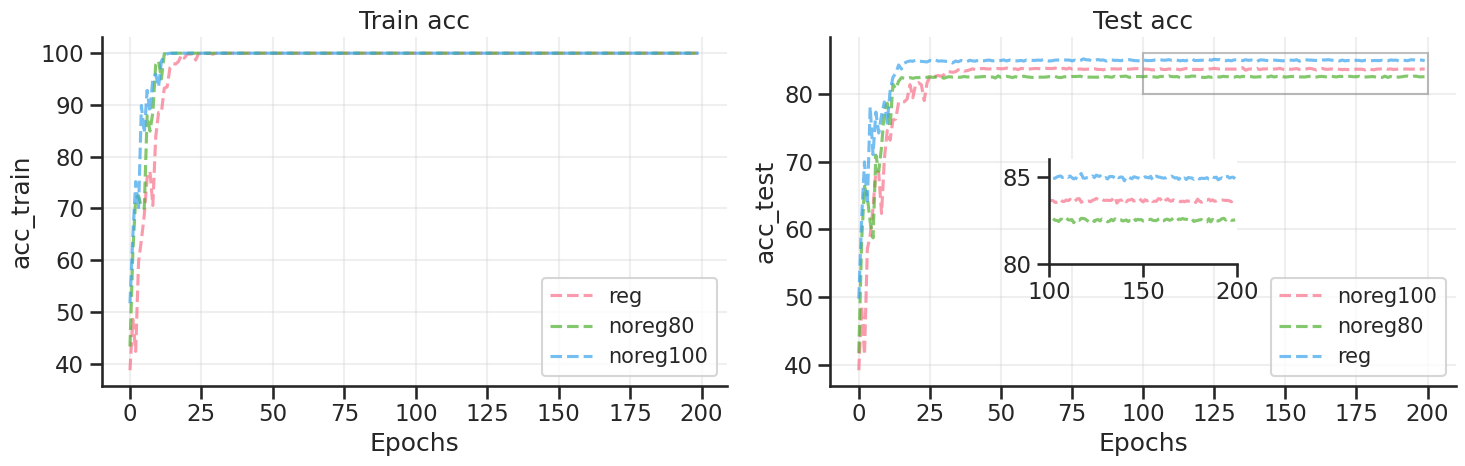

In [22]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
colors = sns.color_palette("husl", 3)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(reg['it'], reg['acc_train'], 
        label='reg', color=colors[0], alpha=0.7,
        linestyle='--')
axes[0].plot(noreg80['it'], noreg80['acc_train'], 
        label='noreg80', color=colors[1], alpha=0.7,
        linestyle='--')
axes[0].plot(noreg100['it'], noreg100['acc_train'], 
        label='noreg100', color=colors[2], alpha=0.7,
        linestyle='--')
# axes[0].plot(config_data['it'], config_data['acc_train'] + jitter, 
#         label=short_config, color=colors[idx], alpha=0.7,
#         linestyle=linestyle)

axes[1].plot(reg['it'], reg['acc_test'] , 
        label='noreg100', color=colors[0], alpha=0.7,
        linestyle='--')   
 
axes[1].plot(noreg80['it'], noreg80['acc_test'] , 
        label='noreg80', color=colors[1], alpha=0.7,
        linestyle='--')

axes[1].plot(noreg100['it'], noreg100['acc_test'] , 
        label='reg', color=colors[2], alpha=0.7,
        linestyle='--')

axes[0].set_xlabel('Epochs')
axes[1].set_xlabel('Epochs')
#plt.xlabel('Iterations')
axes[0].set_ylabel("acc_train")
axes[1].set_ylabel('acc_test')
axes[0].set_title("Train acc")
axes[1].set_title("Test acc")
#plt.title('Evolution of L_test Across Different Configurations')
axes[0].grid(True, alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[0].legend(fontsize='small') 
axes[1].legend(fontsize='small')
axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)

# Inset Zoomed Region for axes[0]
axins = inset_axes(axes[1], width="30%", height="30%", loc='center')  # Adjust size and position
axins.plot(reg['it'], reg['acc_test'], color=colors[0], linestyle='--', alpha=0.7)
axins.plot(noreg80['it'], noreg80['acc_test'], color=colors[1], linestyle='--', alpha=0.7)
axins.plot(noreg100['it'], noreg100['acc_test'], color=colors[2], linestyle='--', alpha=0.7)
axins.spines[['right', 'top']].set_visible(False)
# Set zoomed region range
axins.set_xlim(100, 200)  # Zoom-in range on x-axis
axins.set_ylim(80, 86)  # Adjust y-axis limits as needed

# Add a rectangle indicating the zoomed region
axes[1].indicate_inset_zoom(axins)

# Layout adjustment
plt.tight_layout()
plt.savefig('./data/acc.png', bbox_inches='tight', dpi=300)
plt.show()